# Tarefa 1

##Parte 1


Substituir a onda plana na equação de onda  leva à chamada equação de Christoffel para a velocidade de fase $V$ e o vetor de polarização $\mathbf{U}$ :
\
\
$$
\left[\begin{array}{ccc}
G_{11}-\rho V^2 & G_{12} & G_{13} \\
G_{21} & G_{22}-\rho V^2 & G_{23} \\
G_{31} & G_{32} & G_{33}-\rho V^2
\end{array}\right]\left[\begin{array}{c}
U_1 \\
U_2 \\
U_3
\end{array}\right]=0
$$
\
Os autovalores são obtidos por
$$
\operatorname{det}\left[G_{i k}-\rho V^2 \delta_{i k}\right]=0 \text {, }
$$

Para iniciar o processo de resolução deste problema, vamos resolver para o meio TI no plano $x_1 - x_3$ considerando o ângulo teta variando de 0º a 90º para a incidência da onda, vamos encontrar as velocidades VP, VSH e VSV de acordo com a polarização , para a polarização $U_1$ temos a onda P, para $U_2$ a onda SH e $U_3$ a onda SV
\
\
Aqui $G_{ik}$ é a matriz de Christoffel, que depende das propriedades do meio (rigidez) e da direção de propagação da onda para o meio TI que temos:
\
$$  G_{11} =  C_{11} n_1^2 + C_{66}n_2^2 + C_{55}n_3^2 \\
    G_{22} =  C_{66} n_1^2 + C_{11}n_2^2 + C_{55}n_3^2 \\
    G_{33} =  C_{55}( n_1^2 + n_2^2)  + C_{33}n_3^2 \\
    G_{12} =  (C_{11} - C_{66})n_1 n_2\\
    G_{13} =  (C_{13} + C_{55})n_1 n_3\\
    G_{23} =  (C_{13} - C_{55})n_2 n_3\\
$$
Como no meio TI todos os planos que contêm o eixo de simetria são equivalentes, é suficiente estudar a propagação das ondas em um único plano vertical. Escolher o plano $[x_1,x_3]$ $(n_2 = 0)$ e substituir as equações acima na equação de Christoffel produz
\
$$
\begin{bmatrix}
C_{11}n_1^2 C_{55}n_3^2- \rho V^2 & 0  & (C_{13}+ C_{55})n_1n_3 \\
0 & C_{66}n_1^2 C_{55}n_3^2- \rho V^2 & 0 \\
 (C_{13}+ C_{55})n_1n_3 & 0  & C_{55}n_1^2 C_{33}n_3^2- \rho V^2
\end{bmatrix} \cdot \begin{bmatrix} U_1 \\ U_2 \\ U_3 \end{bmatrix}= 0
$$
\
Expressar o vetor unitário n na equação em termos do ângulo de fase $\theta$ com o eixo de simetria $n_1 = sin(\theta)$ ; $n_3 = cos(\theta)$
\
$$
\begin{bmatrix}
C_{11} sin(\theta)^2 C_{55}cos(\theta)^2- \rho V^2 & 0  & (C_{13}+ C_{55})sin(\theta)cos(\theta) \\
0 & C_{66}sin(\theta)^2 C_{55}cos(\theta)^2- \rho V^2 & 0 \\
 (C_{13}+ C_{55})sin(\theta)cos(\theta) & 0  & C_{55}sin(\theta)^2 C_{33}cos(\theta)^2- \rho V^2
\end{bmatrix} \cdot \begin{bmatrix} U_1 \\ U_2 \\ U_3 \end{bmatrix}= 0
$$
O objetivo da tarefa é encontrar as velocidades VP, VSH e VSV para os ângulos $\theta$ entre $0^o$ e $90^0$
graus.
\
\
Então será resolvido o sistema 3x3 simbolicamente usando o pacote Sympy, onde o vetor velocidade V será solução e o restante serão variáveis constantes. Para solução de ondas planas em meios VTI tem-se:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Matrix, sin, cos, det, solve, rad

# Def que calcula as soluções do sistema de forma simbolica para Vp, Vsh Vsv

def calcular_solucoes_V(C11, C13, C33, C55, C66, thetas, rho):
    V = symbols("V")
    Vp  = []
    Vsv = []
    Vsh = []

    for theta in thetas:
        theta_rad = rad(theta)  # Converte ângulo para radianos
        matriz = Matrix([[C11*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2, 0, (C13 + C55)*sin(theta_rad)*cos(theta_rad)],
                         [0, C66*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2,0],
                         [(C13 + C55)*sin(theta_rad)*cos(theta_rad),0, C55*sin(theta_rad)**2 + C33*cos(theta_rad)**2 - rho*V**2]])
        solucao_V = solve(det(matriz), V**2)
        #if solucao_V:
        Vsv.append(np.sqrt(float(solucao_V[0])))
        Vsh.append(np.sqrt(float(solucao_V[1])))
        Vp.append(np.sqrt(float(solucao_V[-1])))

    return Vsv, Vsh, Vp

In [2]:
# Teste
# Parâmetros fornecidos
rho = 2300  # kg/m^3
C11 = 25*1e9  # GPa
C33 = 20*1e9  # GPa
C55 = 12*1e9  # GPa
C13 = 16*1e9  # GPa
C66 = 14*1e9  # GPa
# Ângulos de 0 a 90 graus
thetas = np.linspace(0,90,50)

V = symbols("V")
Vp  = []
Vsv = []
Vsh = []

for theta in thetas:
  theta_rad = rad(theta)  # Converte ângulo para radianos
  matriz = Matrix([[C11*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2, 0, (C13 + C55)*sin(theta_rad)*cos(theta_rad)],
                         [0, C66*sin(theta_rad)**2 + C55*cos(theta_rad)**2 - rho*V**2,0],
                         [(C13 + C55)*sin(theta_rad)*cos(theta_rad),0, C55*sin(theta_rad)**2 + C33*cos(theta_rad)**2 - rho*V**2]])
  solucao_V = solve(det(matriz), V**2)
        #if solucao_V:
  Vsv.append(np.sqrt(float(solucao_V[0])))
  Vsh.append(np.sqrt(float(solucao_V[1])))
  Vp.append(np.sqrt(float(solucao_V[-1])))

solucao_V



[5217391.30434783, 6086956.52173913, 10869565.2173913]

In [3]:
# Parâmetros fornecidos
rho = 2300  # kg/m^3
C11 = 25*1e9  # GPa
C33 = 20*1e9  # GPa
C55 = 12*1e9  # GPa
C13 = 16*1e9  # GPa
C66 = 14*1e9  # GPa
# Ângulos de 0 a 90 graus
thetas = np.linspace(0,90,50)

Vsv, Vsh, Vp = calcular_solucoes_V(C11, C13, C33, C55,C66, thetas, rho)

In [4]:
Vsh0  = np.sqrt(C55/rho)
theta_rad = np.deg2rad(thetas)
vsh_num = np.sqrt((C66 * np.sin(theta_rad)**2 + C55 * np.cos(theta_rad)**2) / rho)
#O primeiro valor de Vsh, para angulo 0 graus pelo cáculo da equão de Christoffel deu um valor outlier, esse foi substituído pelo valor ja conhecido de Vsh0 = sqrt(C55/rho)
Vsh[0] = Vsh0
Vsh90 = np.sqrt(C66/rho)


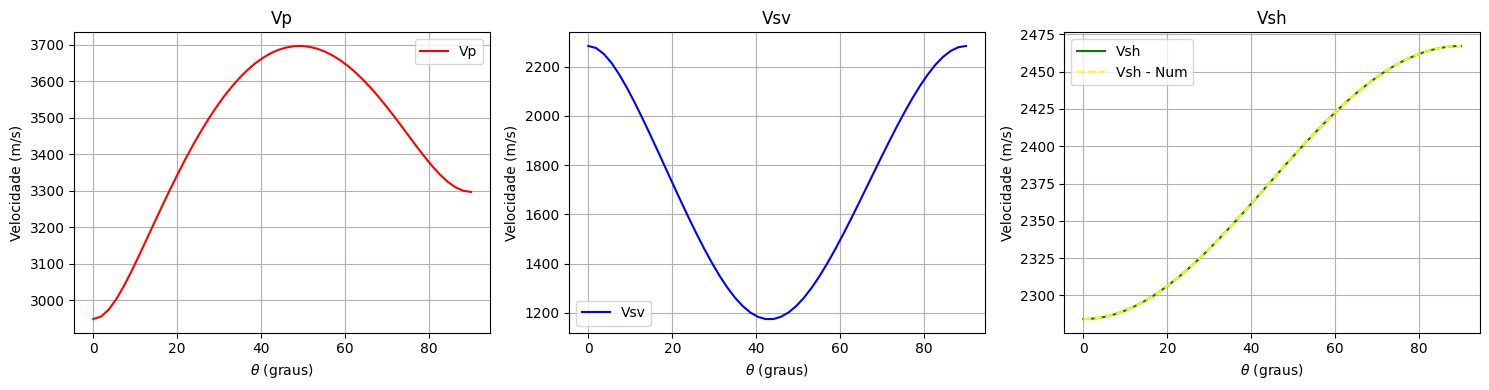

In [5]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(thetas, Vp, color='red', label='Vp')
axes[0].set_title('Vp')
axes[0].set_xlabel(r'$\theta$ (graus)')
axes[0].set_ylabel('Velocidade (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(thetas, Vsv, color='blue', label='Vsv')
axes[1].set_title('Vsv')
axes[1].set_xlabel(r'$\theta$ (graus)')
axes[1].set_ylabel('Velocidade (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(thetas, Vsh, color='green', label='Vsh')
axes[2].plot(thetas, vsh_num, color='yellow', linestyle='--', label='Vsh - Num')
#axes[2].plot(thetas[0], Vsh0, 'go', label='Vsh0')
#axes[2].plot(thetas[49], Vsh90, 'go', label='Vsh90')
axes[2].set_title('Vsh')
axes[2].set_xlabel(r'$\theta$ (graus)')
axes[2].set_ylabel('Velocidade (m/s)')
axes[2].legend()
axes[2].grid(True)
plt.tight_layout()

plt.show()



In [6]:
import plotly.graph_objs as go
# Criação dos gráficos usando Plotly
layout = {
    'xaxis': {'title': r'$\theta$ (radianos)', 'titlefont': {'size': 14}, 'showgrid': True},
    'yaxis': {'titlefont': {'size': 14}, 'showgrid': True},
    'showlegend': True
}

fig1 = go.Figure(go.Scatter(x=thetas, y=Vp, mode='lines', line=dict(color='red'), name='Vp'))
fig1.update_layout(layout)
fig1.update_layout(title='<b>Vp</b>', title_x=0.5, title_y=0.95, title_font=dict(size=16), width=1500, height=800)

fig2 = go.Figure(go.Scatter(x=thetas, y=Vsv, mode='lines', line=dict(color='green'), name='Vsv'))
fig2.update_layout(layout)
fig2.update_layout(title='<b>Vsv</b>', title_x=0.5, title_y=0.95, title_font=dict(size=16), width=1500, height=800)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=thetas, y=Vsh, mode='lines', line=dict(color='blue'), name='Vsh'))

fig3.add_trace(go.Scatter(x=thetas, y=vsh_num, mode='lines', line=dict(color='black', dash='dash'), name='Vsh'))
fig3.update_layout(layout)
fig3.update_layout(title='<b>Vsh</b>', title_x=0.5, title_y=0.95, title_font=dict(size=16), width=1500, height=800)

fig1.show()
fig2.show()
fig3.show()


##Parte 2

De acordo com o artigo de Thomsen de 1986, as velocidades da onda P (VP), da onda S vertical (VSV) e da onda S horizontal (VSH) para um meio isotrópico transversal (TI) podem ser expressas da seguinte forma:
- VP, velocidade P:
$$ \alpha_0 = \sqrt{\frac{C_{33}}{\rho}} $$
- VSH, velocidade S horizontal:
$$ \beta_0 = \sqrt{\frac{C_{44}}{\rho}} $$
As equações (7) são dadas precisamente como segue:

\begin{aligned}
& V_P^2(\theta)=\alpha_0^2\left[1+\varepsilon \sin ^2 \theta+D^*(\theta)\right] ; \\
& v_{SV}^2(0)=\beta_0^2\left[1+\frac{\alpha_0^2}{\beta_0^2} \varepsilon \sin ^2
\theta-\frac{\alpha_0^2}{\beta_0^2} D^*(\theta)\right] \text {; } \\
& v_{SH}^2(\theta)=\beta_0^2\left[1+2 \gamma \sin ^2 \theta\right] \text {, } \\
& \text { with } \\& D^*(\theta) \equiv \frac{1}{2}\left(1-
\frac{\beta_0^2}{\alpha_0^2}\right)\left\{\left[1+\frac{4 \delta^*}{\left(1-\beta_0^2 /
\alpha_0^2\right)^2} \sin ^2 \theta \cos ^2 \theta\right.\right. \\
& \left.\left.+\frac{4\left(1-\beta_0^2 / \alpha_0^2+\varepsilon\right)
\varepsilon}{\left(1-\beta_0^2 / \alpha_0^2\right)^2} \sin ^4 \theta\right]^{1 / 2}-
1\right\} \text {. } \\
&
\end{aligned}


Fazendo aproximação para anisotropia fraca, temos:$$
D^* \approx \frac{\delta^*}{\left(1-\beta_0^2 / \alpha_0^2\right)} \sin ^2 \theta \cos ^2
\theta+\varepsilon \sin ^4 \theta$$
e
\begin{aligned}
& v_p(\theta)=\alpha_0\left(1+\delta \sin ^2 \theta \cos ^2 \theta+\varepsilon \sin ^4
\theta\right), \\
& v_{S H}(\theta)=\beta_0\left[1+\frac{\alpha_0^2}{\beta_0^2}(\varepsilon-\delta) \sin
^2 \theta \cos ^2 \theta\right], \\
& v_{S H}(\theta)=\beta_0\left(1+\gamma \sin ^2 \theta\right) .
\end{aligned}

Faça gráficos para VP, VSH e VSV em função de “$\theta$” para cinco exemplos
alternando entre anisotropia fraca, moderada e forte:


Exemplo 1:
$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { Sample } & \text { Conditions } & \begin{array}{l}
V_P(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \begin{array}{l}
V_S(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \varepsilon & \delta * & \delta & \gamma & \rho\left(\mathrm{g} / \mathrm{cm}^3\right) \\
\hline \begin{array}{l}
\text { Taylor }{ }^1 \\
\text { sandstone }
\end{array} & \begin{array}{l}
\mathrm{P}_{\text {eff }}=0 \mathrm{MPa}, \\
\text { saturated }
\end{array} & \begin{array}{r}
11050 \\
3368
\end{array} & \begin{array}{c}
6000 \\
1829
\end{array} & 0.110 & -0.127 & -0.035 & 0.255 & 2.500 \\
\hline
\end{array}$$


Além disso, selecione quatro exemplos adicionais do artigo (páginas 1948-1961) e conduza
uma pesquisa bibliográfica para identificar locais ou reservatórios que apresentam esses tipos de anisotropias.

In [7]:
  #Função de Thomsen completa

def thomsen_complete(alpha, beta, epsilon, delta1, gamma, rho, theta):
    theta = np.deg2rad(theta)  # graus para radianos
    argument_1 = (1 - (beta**2 / alpha**2))
    argument_2 = 1 + ( 4 * delta1 * np.sin(theta)**2 * np.cos(theta)**2 / (1 - (beta**2 / alpha**2))**2)
    argument_3 = (1 - (beta**2 / alpha**2) + epsilon)
    argument_4 = (1 - beta**2 / alpha**2)

    D = 0.5*argument_1 * (argument_2 + 4 * (argument_3) * epsilon * np.sin(theta)**4 / (argument_4)**2 - 1)

    VP  = np.sqrt(alpha**2 * (1 + epsilon * np.sin(theta)**2 + D))
    VSV = np.sqrt(beta**2 * (1 + (alpha**2 / beta**2) * epsilon * np.sin(theta)**2 - (alpha**2 / beta**2) * D))
    VSH = np.sqrt(beta**2 * (1 + 2 * gamma * np.sin(theta)**2))

    return VP, VSV, VSH

  #Função de Thomsen para anizotropia fraca

def thomsen_weak_anizotropy(alpha, beta, epsilon, delta2, gamma, rho, theta):

        theta= np.deg2rad(theta) # graus para radianos
        VP= alpha*(1+delta2*np.sin(theta)**2*np.cos(theta)**2+epsilon*np.sin(theta)**4)
        VSV= beta*(1+alpha**2/beta**2 * (epsilon-delta2)*np.sin(theta)**2*np.cos(theta)**2)
        VSH= beta*(1+gamma*np.sin(theta)**2)
        return VP, VSV, VSH


### Exemplo 1 : Taylor Sandstone

In [8]:
theta=np.linspace(0,90,50)

# Taylor Sandstone (Strong Anisotropy)
alpha_a = 3368 # m/s
beta_a  = 1829 # m/s
epsilon_a = 0.11 # m/s
delta1_a = -0.127 # delta com asterístico
delta2_a = -0.035 # m/s
gamma_a = 0.255 # anisotropia strong
rho_a = 2.500     # m/s

# Thomsem Completo
vp_a,vsv_a,vsh_a = thomsen_complete(alpha_a,beta_a,epsilon_a, delta2_a, gamma_a, rho_a,theta)

# Thomsen anizotropia fraca
vp_weak_a,vsv_weak_a,vsh_weak_a = thomsen_weak_anizotropy(alpha_a,beta_a,epsilon_a, delta2_a, gamma_a, rho_a,theta)


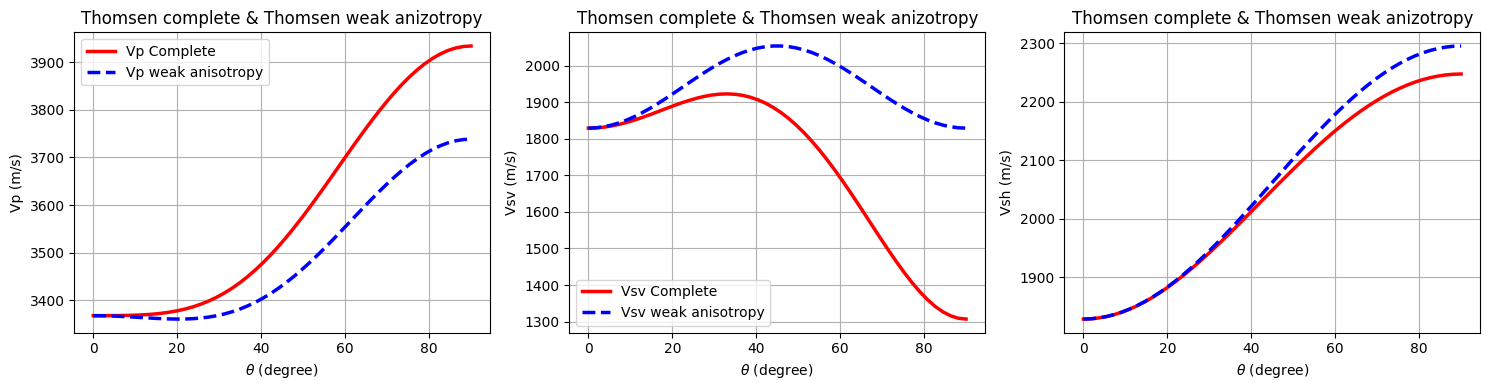

In [11]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(theta, vp_a, color='red', label='Vp Complete', linewidth=2.5)
axes[0].plot(theta, vp_weak_a, color='blue', linestyle='--', label='Vp weak anisotropy', linewidth=2.5)
axes[0].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[0].set_xlabel(r'$\theta$ (degree)')
axes[0].set_ylabel('Vp (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(theta, vsv_a, color='red', label='Vsv Complete', linewidth=2.5)
axes[1].plot(theta, vsv_weak_a, color='blue',linestyle='--', label='Vsv weak anisotropy', linewidth=2.5)
axes[1].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[1].set_xlabel(r'$\theta$ (degree)')
axes[1].set_ylabel('Vsv (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(theta, vsh_a, color='red', label='Vsh Complete', linewidth=2.5)
axes[2].plot(theta, vsh_weak_a, color='blue',linestyle='--', label='Vsh weak anisotropy', linewidth=2.5)
axes[2].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[2].set_xlabel(r'$\theta$ (degree)')
axes[2].set_ylabel('Vsh (m/s)')
axes[2].grid(True)
plt.tight_layout()

plt.show()


### Exemplo 2 : Bandera Sandstone

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { Sample } & \text { Conditions } & \begin{array}{l}
V_P(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \begin{array}{l}
V_S(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \varepsilon & \delta * & \delta & \gamma & \rho\left(\mathrm{g} / \mathrm{cm}^3\right) \\
\hline \begin{array}{l}
\text { Bandera }{ }^{10} \\
\text { sandstone  }
\end{array} & \begin{array}{l}
\mathrm{P}_{\text {eff }}=68.95 \mathrm{MPa}, \\
\text { saturated}
\end{array} & \begin{array}{r}
12500 \\
3810
\end{array} & \begin{array}{c}
7770 \\
2368
\end{array} & 0.03 & 0.037 & 0.045 & 0.03 & 2.160 \\
\hline
\end{array}$$

In [20]:
theta=np.linspace(0,90,50)

# Bandera Sandstone (weak Anisotropy)
alpha_b = 3810 # m/s
beta_b  = 2368 # m/s
epsilon_b = 0.03 # m/s
delta1_b = 0.037 # delta com asterístico
delta2_b = 0.045 # m/s
gamma_b = 0.03 # anisotropia fraca
rho_b = 2.16  #

# Thomsem Completo
vp_b,vsv_b,vsh_b = thomsen_complete(alpha_b,beta_b,epsilon_b, delta2_b, gamma_b, rho_b,theta)

# Thomsen anizotropia fraca
vp_weak_b,vsv_weak_b,vsh_weak_b = thomsen_weak_anizotropy(alpha_b,beta_b,epsilon_b, delta2_b, gamma_b, rho_b,theta)


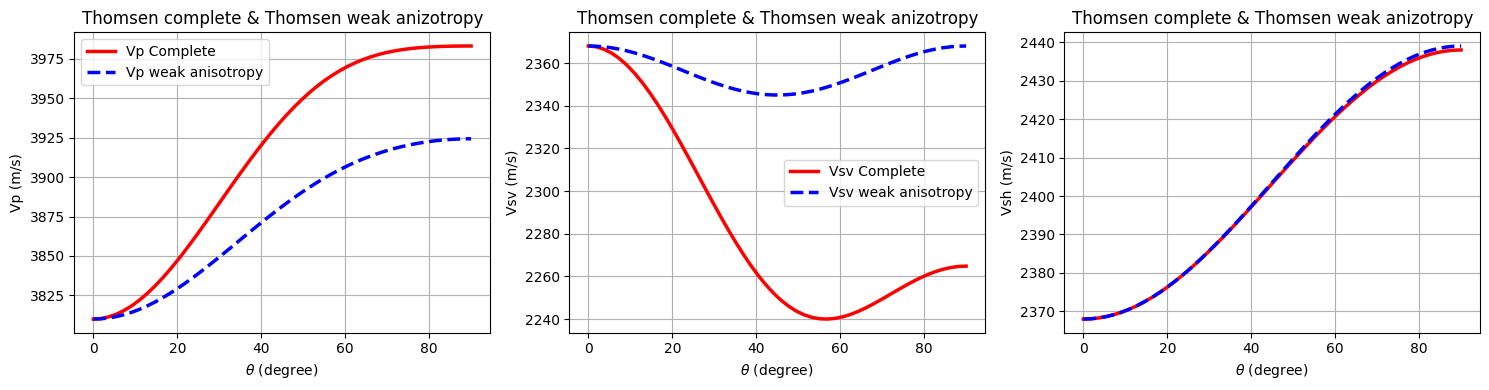

In [21]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(theta, vp_b, color='red', label='Vp Complete', linewidth=2.5)
axes[0].plot(theta, vp_weak_b, color='blue', linestyle='--', label='Vp weak anisotropy', linewidth=2.5)
axes[0].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[0].set_xlabel(r'$\theta$ (degree)')
axes[0].set_ylabel('Vp (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(theta, vsv_b, color='red', label='Vsv Complete', linewidth=2.5)
axes[1].plot(theta, vsv_weak_b, color='blue',linestyle='--', label='Vsv weak anisotropy', linewidth=2.5)
axes[1].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[1].set_xlabel(r'$\theta$ (degree)')
axes[1].set_ylabel('Vsv (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(theta, vsh_b, color='red', label='Vsh Complete', linewidth=2.5)
axes[2].plot(theta, vsh_weak_b, color='blue',linestyle='--', label='Vsh weak anisotropy', linewidth=2.5)
axes[2].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[2].set_xlabel(r'$\theta$ (degree)')
axes[2].set_ylabel('Vsh (m/s)')
axes[2].grid(True)
plt.tight_layout()

plt.show()


### Exemplo 3 : Mesaverde clayshale

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { Sample } & \text { Conditions } & \begin{array}{l}
V_P(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \begin{array}{l}
V_S(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \varepsilon & \delta * & \delta & \gamma & \rho\left(\mathrm{g} / \mathrm{cm}^3\right) \\
\hline \begin{array}{l}
\text { Mesaverde }{(5858.6) }^2 \\
\text { clayshale  }
\end{array} & \begin{array}{l}
\mathrm{P}_{\text {eff }}=27.58 \mathrm{MPa}, \\
\text { satd,undrnd }
\end{array} & \begin{array}{r}
12448 \\
3794
\end{array} & \begin{array}{c}
6804 \\
2074
\end{array} & 0.189 & 0.154 & 0.204 & 0.175 & 2.560 \\
\hline
\end{array}$$

In [30]:
theta=np.linspace(0,90,50)

# Mesaverde clayshale(anisotropia moderada)
alpha_c = 3794 # m/s
beta_c  = 2074 # m/s
epsilon_c = 0.189 # m/s
delta1_c = 0.154 # delta com asterístico
delta2_c = 0.204 # m/s
gamma_c = 0.175 # anisotropia fraca
rho_c = 2.560    # m/s

# Thomsem Completo
vp_c,vsv_c,vsh_c = thomsen_complete(alpha_c,beta_c,epsilon_c, delta2_c, gamma_c, rho_c,theta)

# Thomsen anizotropia fraca
vp_weak_c,vsv_weak_c,vsh_weak_c = thomsen_weak_anizotropy(alpha_c,beta_c,epsilon_c, delta2_c, gamma_c, rho_c,theta)



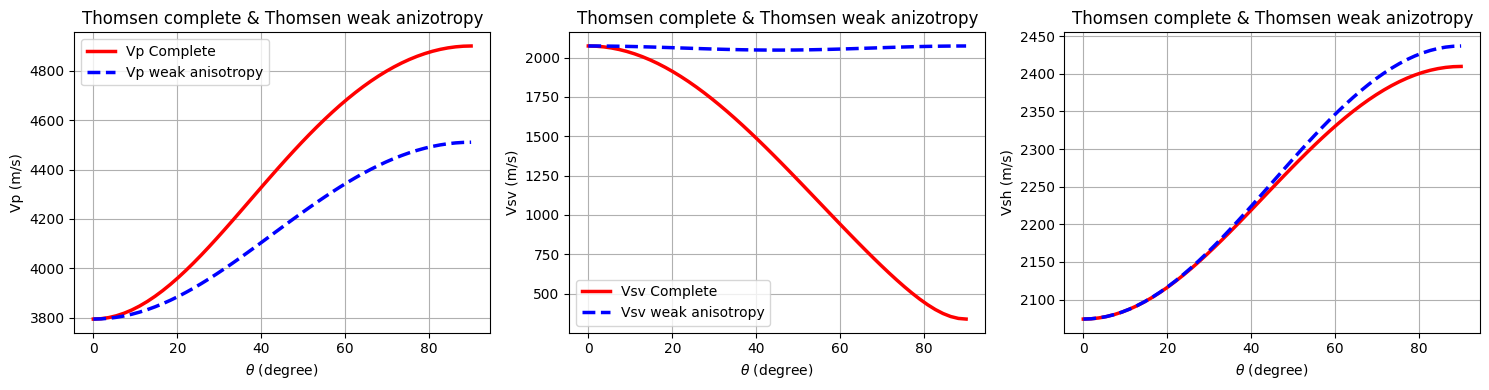

In [31]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(theta, vp_c, color='red', label='Vp Complete', linewidth=2.5)
axes[0].plot(theta, vp_weak_c, color='blue', linestyle='--', label='Vp weak anisotropy', linewidth=2.5)
axes[0].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[0].set_xlabel(r'$\theta$ (degree)')
axes[0].set_ylabel('Vp (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(theta, vsv_c, color='red', label='Vsv Complete', linewidth=2.5)
axes[1].plot(theta, vsv_weak_c, color='blue',linestyle='--', label='Vsv weak anisotropy', linewidth=2.5)
axes[1].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[1].set_xlabel(r'$\theta$ (degree)')
axes[1].set_ylabel('Vsv (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(theta, vsh_c, color='red', label='Vsh Complete', linewidth=2.5)
axes[2].plot(theta, vsh_weak_c, color='blue',linestyle='--', label='Vsh weak anisotropy', linewidth=2.5)
axes[2].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[2].set_xlabel(r'$\theta$ (degree)')
axes[2].set_ylabel('Vsh (m/s)')
axes[2].grid(True)
plt.tight_layout()

plt.show()

### Exemplo 4 : Mesaverde silty Limestone

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { Sample } & \text { Conditions } & \begin{array}{l}
V_P(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \begin{array}{l}
V_S(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \varepsilon & \delta * & \delta & \gamma & \rho\left(\mathrm{g} / \mathrm{cm}^3\right) \\
\hline \begin{array}{l}
\text { Mesaverde }{(5469.5) }^2 \\
\text { silty limestone  }
\end{array} & \begin{array}{l}
\mathrm{P}_{\text {eff }}=27.58 \mathrm{MPa}, \\
\text { satd,undrnd }
\end{array} & \begin{array}{r}
16312 \\
4972
\end{array} & \begin{array}{c}
9512 \\
2899
\end{array} & 0.056 & -0.041 & -0.003 & 0.067 & 2.630 \\
\hline
\end{array}$$

\
####

In [33]:
theta=np.linspace(0,90,50)

# Mesaverde silty Limestone(anisotropia fraca)
alpha_d = 4972 # m/s
beta_d  = 2899 # m/s
epsilon_d = 0.056 # m/s
delta1_d = -0.041 # delta com asterístico
delta2_d = -0.003 # m/s
gamma_d = 0.067 # anisotropia fraca
rho_d = 2.630     # m/s

# Thomsem Completo
vp_d,vsv_d,vsh_d = thomsen_complete(alpha_d,beta_d,epsilon_d, delta2_d, gamma_d, rho_d,theta)

# Thomsen anizotropia fraca
vp_weak_d,vsv_weak_d,vsh_weak_d = thomsen_weak_anizotropy(alpha_d,beta_d,epsilon_d, delta2_d, gamma_d, rho_d,theta)



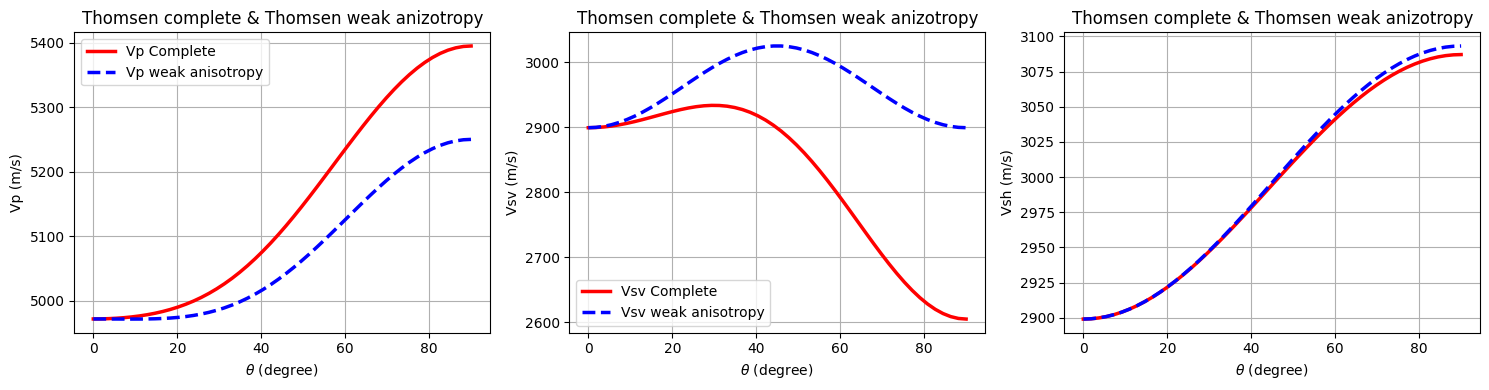

In [34]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(theta, vp_d, color='red', label='Vp Complete', linewidth=2.5)
axes[0].plot(theta, vp_weak_d, color='blue', linestyle='--', label='Vp weak anisotropy', linewidth=2.5)
axes[0].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[0].set_xlabel(r'$\theta$ (degree)')
axes[0].set_ylabel('Vp (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(theta, vsv_d, color='red', label='Vsv Complete', linewidth=2.5)
axes[1].plot(theta, vsv_weak_d, color='blue',linestyle='--', label='Vsv weak anisotropy', linewidth=2.5)
axes[1].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[1].set_xlabel(r'$\theta$ (degree)')
axes[1].set_ylabel('Vsv (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(theta, vsh_d, color='red', label='Vsh Complete', linewidth=2.5)
axes[2].plot(theta, vsh_weak_d, color='blue',linestyle='--', label='Vsh weak anisotropy', linewidth=2.5)
axes[2].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[2].set_xlabel(r'$\theta$ (degree)')
axes[2].set_ylabel('Vsh (m/s)')
axes[2].grid(True)
plt.tight_layout()

plt.show()

### Exemplo 5 : Shale

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { Sample } & \text { Conditions } & \begin{array}{l}
V_P(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \begin{array}{l}
V_S(\mathrm{f} / \mathrm{s}) \\
(\mathrm{m} / \mathrm{s})
\end{array} & \varepsilon & \delta * & \delta & \gamma & \rho\left(\mathrm{g} / \mathrm{cm}^3\right) \\
\hline \begin{array}{l}
\text { Shale }{(5000) }^7 \\
\text {  }
\end{array} & \begin{array}{l}
\mathrm{P}_{\text {c }}=0 \mathrm{MPa}, \\
\text { satd,undrnd }
\end{array} & \begin{array}{r}
10000 \\
3048
\end{array} & \begin{array}{c}
4890 \\
1490
\end{array} & 0.255 & -0.270 & -0.050 & 0.480 & 2.420 \\
\hline
\end{array}$$

\
####Essa anizotropia é presente na Bacia de Williston, Dakota do Norte. A bacia se encontra entre os territõrios dos Estados Unidos e Canadá. Vp e Vs foram medidas em laboratório de 1 bar a 4 kbar de pressão para amostras úmidas e não drenadas, são folhelhos do Cretáceo de profundidades de 3.200 e 5.000 pés.  Esses folhelhos comportam-se como meios VTI, com plano de simetria circular coincidindo com o plano de estratificação. Para ondas compressivas, a velocidade é maior para propagação no plano de estratificação do que em ângulos retos a ele, e a anisotropia é maior para o folhelho a 5.000 pés.
\
Fonte: https://pubs.geoscienceworld.org/geophysics/article/46/3/288/68516/Ultrasonic-velocities-in-Cretaceous-shales-from?casa_token=D8861SRhFaQAAAAA:mLrq7yFn2RO4Xo5-1ahiC53k4e0uoYt8z4rhiyuVQzrdAklu6PwpG4rZTqEvfisrppDNWernnAs

In [41]:
theta=np.linspace(0,90,50)

# Shale(anisotropia forte)
alpha_e = 3048 # m/s
beta_e  = 1490 # m/s
epsilon_e = 0.255 # m/s
delta1_e = -0.270 # delta com asterístico
delta2_e = -0.050 # m/s
gamma_e = 0.48 # anisotropia fraca
rho_e = 2.420     # m/s

# Thomsem Completo
vp_e,vsv_e,vsh_e = thomsen_complete(alpha_e,beta_e,epsilon_e, delta2_e, gamma_e, rho_e,theta)

# Thomsen anizotropia fraca
vp_weak_e,vsv_weak_e,vsh_weak_e = thomsen_weak_anizotropy(alpha_e,beta_e,epsilon_e, delta2_e, gamma_e, rho_e,theta)



<ipython-input-7-30d779b009b8>:13: RuntimeWarning:

invalid value encountered in sqrt



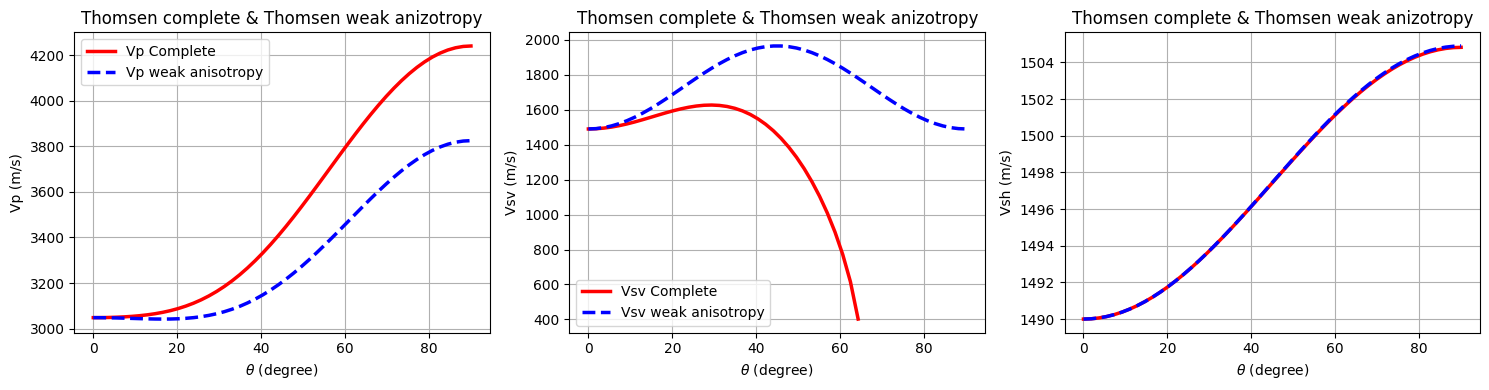

In [40]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Vp
axes[0].plot(theta, vp_e, color='red', label='Vp Complete', linewidth=2.5)
axes[0].plot(theta, vp_weak_e, color='blue', linestyle='--', label='Vp weak anisotropy', linewidth=2.5)
axes[0].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[0].set_xlabel(r'$\theta$ (degree)')
axes[0].set_ylabel('Vp (m/s)')
axes[0].legend()
axes[0].grid(True)
plt.tight_layout()

# Subplot 2: Vsv
axes[1].plot(theta, vsv_e, color='red', label='Vsv Complete', linewidth=2.5)
axes[1].plot(theta, vsv_weak_e, color='blue',linestyle='--', label='Vsv weak anisotropy', linewidth=2.5)
axes[1].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[1].set_xlabel(r'$\theta$ (degree)')
axes[1].set_ylabel('Vsv (m/s)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

# Subplot 3: Vsh
axes[2].plot(theta, vsh_e, color='red', label='Vsh Complete', linewidth=2.5)
axes[2].plot(theta, vsh_weak_e, color='blue',linestyle='--', label='Vsh weak anisotropy', linewidth=2.5)
axes[2].set_title('Thomsen complete & Thomsen weak anizotropy')
axes[2].set_xlabel(r'$\theta$ (degree)')
axes[2].set_ylabel('Vsh (m/s)')
axes[2].grid(True)
plt.tight_layout()

plt.show()